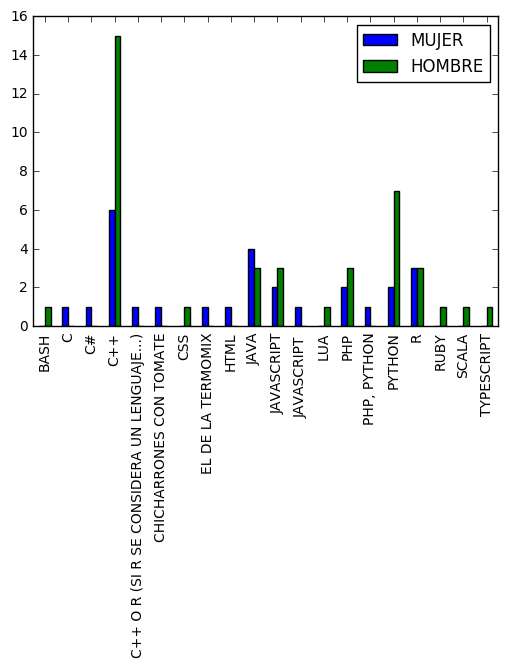

In [99]:
# -*- coding: utf-8 -*- 
import requests
import io
import  csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import cufflinks as cf
cf.set_config_file(offline=False, world_readable=True, theme='ggplot')
%matplotlib inline
headers={}
headers["User-Agent"]= "Mozilla/5.0 (Windows NT 6.2; WOW64; rv:22.0) Gecko/20100101 Firefox/22.0"
headers["DNT"]= "1"
headers["Accept"] = "text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8"
headers["Accept-Encoding"] = "deflate"
headers["Accept-Language"]= "es-ES,en;q=0.5"
headers["Content-Type"]= "application/x-www-form-urlencoded; charset=UTF-8"
lines = []

file_id="1xFpri9AF6N23vo6J5UUA_d5rY_oeVwpQ-EUBani0O7M"
url = "https://docs.google.com/spreadsheets/d/{0}/export?format=csv".format(file_id)

r = requests.get(url)
r.encoding ='utf-8'



data = {}
datas = [];
cols = []
lenguaje = {}
sio = io.StringIO( r.text, newline=None)
reader = csv.reader(sio, dialect=csv.excel)
rownum = 0

for row in reader:
    if rownum == 0:
        for col in row:
            col=col.upper();
            data[col] = ''
            cols.append(col)
        

    else:
        i = 0
        for col in row:
            col=col.upper()
            data[cols[i]] = col
            if (i==1):
                if (not col in lenguaje):
                    lenguaje[col]={}
            elif (i==2):
                genero=data[cols[i-1]]
                if (col in lenguaje[genero]):
                    lenguaje[genero][col]+=1
                else:
                    lenguaje[genero][col]=1;
            i = i +1
    rownum = rownum + 1

generos=lenguaje.keys();

d=[{'MUJER':lenguaje['MUJER']['C++'],'HOMBRE':lenguaje['HOMBRE']['C++']}]

df = pd.DataFrame(data=lenguaje,columns=['MUJER','HOMBRE'])
df.head()
my_plot = df.plot(kind='bar')